In [1]:
#install.packages("cubature")

In [2]:
library(cubature)
library(ggplot2)

options(repr.plot.width = 12, repr.plot.height = 8)

In [3]:
a <- pi

a

[1] 3.141593

In [4]:
b <- 3.142

b

[1] 3.142

In [5]:
error <- a - b

error

[1] -0.0004073464

In [6]:
x <- seq(-1, 7, .5)

x

[1] -1.0 -0.5  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0
[16]  6.5  7.0

In [7]:
 f_x <- expression(4*x^2)

 f_x

expression(4 * x^2)

In [8]:
y <- eval(f_x)

y

[1]   4   1   0   1   4   9  16  25  36  49  64  81 100 121 144 169 196

In [9]:
data_points <- data.frame(x, y)

data_points

x,y
<dbl>,<dbl>
-1.0,4
-0.5,1
0.0,0
0.5,1
1.0,4
1.5,9
2.0,16
2.5,25
3.0,36


In [10]:
poly_fun <- function(x) {
    return (4 * x^2)
}

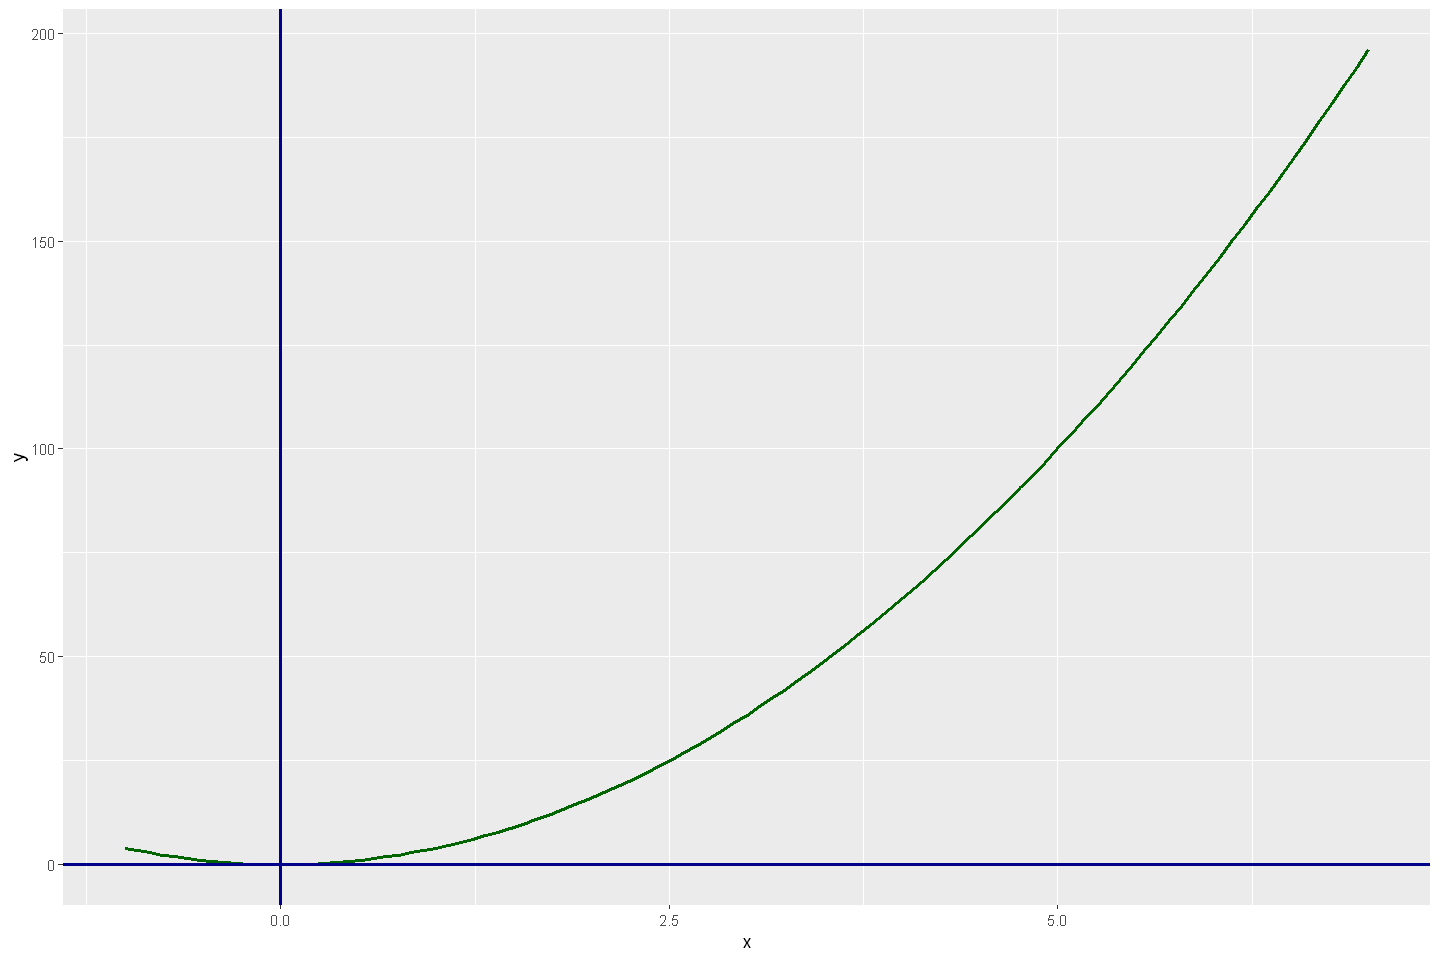

In [11]:
ggplot(data_points, aes(x = x, y = y)) +
    stat_function(fun = poly_fun, col = "darkgreen", size = 1, alpha = 1) +
    geom_hline(aes(yintercept = 0), size = 1, col = "darkblue") +
    geom_vline(aes(xintercept = 0), size = 1, col = "darkblue")

In [12]:
x <- c(3, 5)
y <- c(36, 100)

In [13]:
two_points <- data.frame(x, y)
two_points

x,y
<dbl>,<dbl>
3,36
5,100


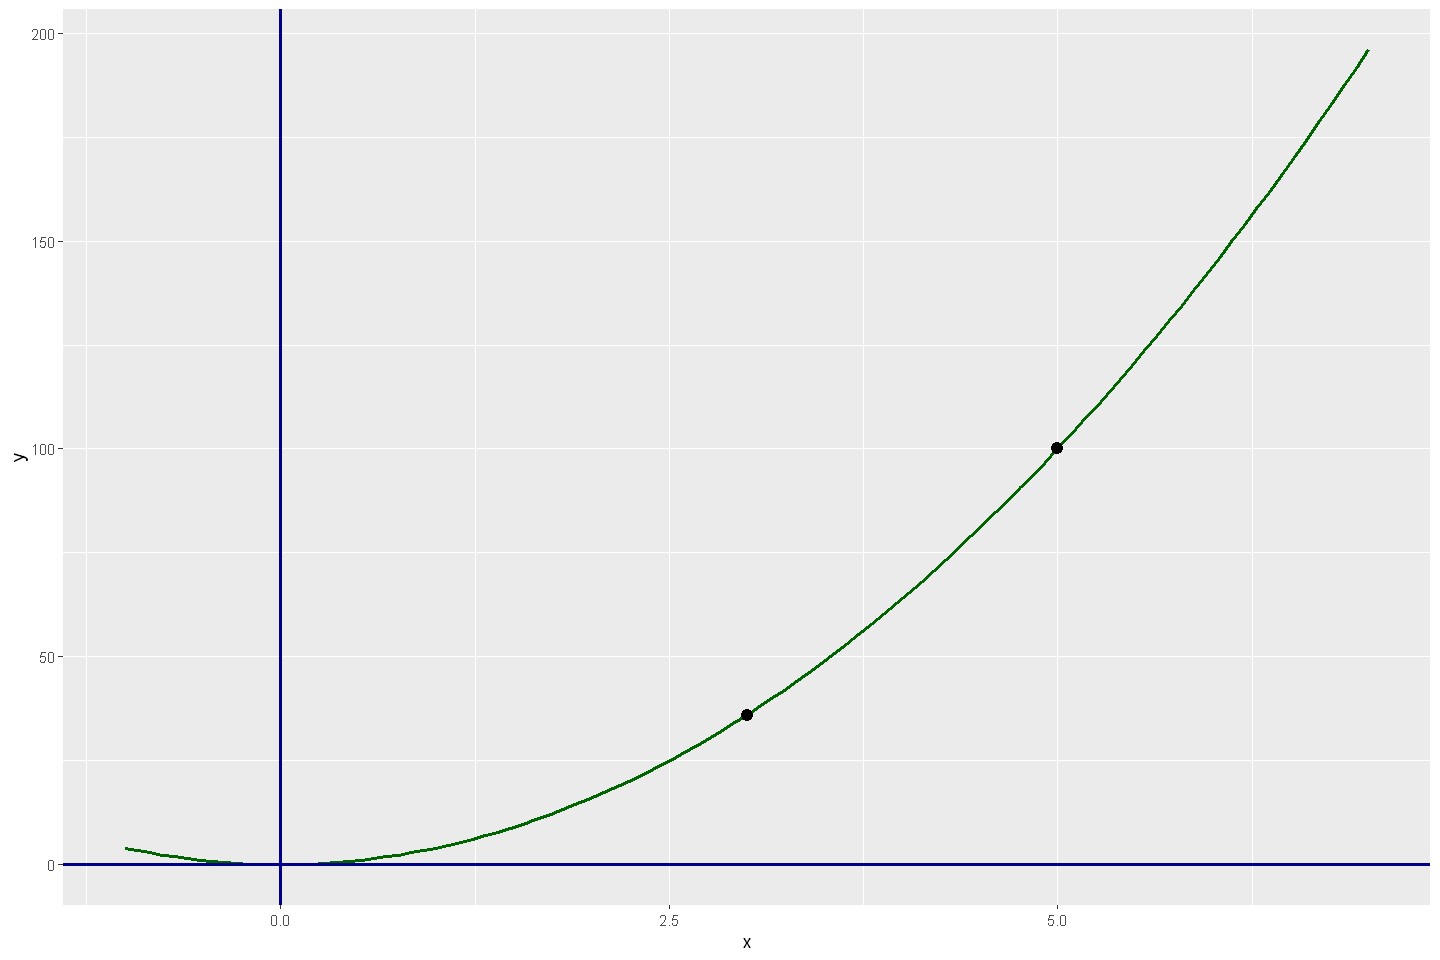

In [14]:
ggplot(data_points, aes(x = x, y = y)) +
    stat_function(fun = poly_fun, col = "darkgreen", size = 1, alpha = 1) +
    geom_hline(aes(yintercept = 0), size = 1, col = "darkblue") +
    geom_vline(aes(xintercept = 0), size = 1, col = "darkblue") +
    geom_point(col = "black", data = two_points, size = 3)

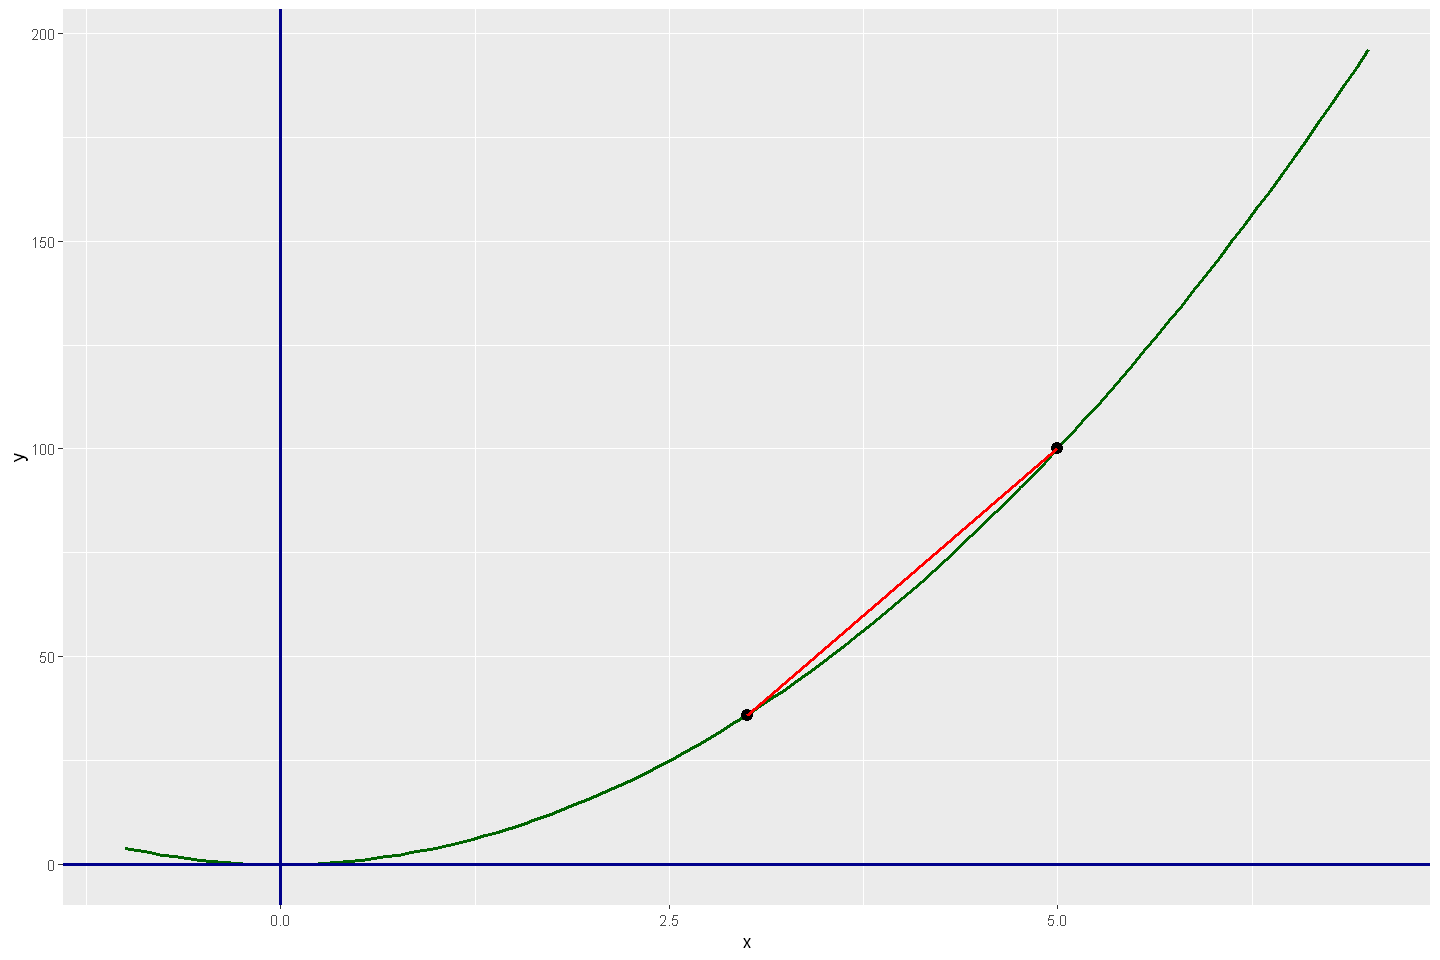

In [15]:
ggplot(data_points, aes(x = x, y = y)) +
    stat_function(fun = poly_fun, col = "darkgreen", size = 1, alpha = 1) +
    geom_hline(aes(yintercept = 0), size = 1, col = "darkblue") +
    geom_vline(aes(xintercept = 0), size = 1, col = "darkblue") +
    geom_point(col = "black", data = two_points, size = 3) +
    geom_line(col = "red", data = two_points, size = 1)

In [16]:
x <- 3
h <- .1

In [17]:
f_x <- expression(4*x^2)

f_x

expression(4 * x^2)

In [18]:
f_x_h <- expression(4 * (x + h)^2)

f_x_h

expression(4 * (x + h)^2)

In [19]:
dx <- D(f_x, 'x')

dx

4 * (2 * x)

In [20]:
true_value <- eval(dx)

true_value

[1] 24

In [21]:
approx_value <- (eval(f_x_h) - eval(f_x)) / h

approx_value

[1] 24.4

In [22]:
true_error_value <- true_value - approx_value

true_error_value

[1] -0.4

In [23]:
rel_true_error <- true_error_value / true_value

rel_true_error

[1] -0.01666667

In [24]:
x <- 3
h <- .0001

In [25]:
true_value <- eval(dx)

true_value

[1] 24

In [26]:
approx_value <- (eval(f_x_h) - eval(f_x)) / h

approx_value

[1] 24.0004

In [27]:
true_error_value <- true_value - approx_value

true_error_value

[1] -4e-04

In [28]:
rel_true_error <- true_error_value / true_value

rel_true_error

[1] -1.666667e-05

In [29]:
y_dash <- function(t_i, y) {
    y
}

y_dash

function(t_i, y) {
    y
}

In [30]:
t_0 <- 0
t_n <- 6
h <- 1
y_0 <- 1

In [31]:
euler_method <- function(t_0, h, t_n, y_0, y_dash) {
    t_seq <- seq(t_0, t_n, by = h)
    
    data_frame <- data.frame(t_i = t_seq)
    
    data_frame$h <- h
    data_frame$y_i <- y_0
    
    data_frame$f_dash[1] <- y_dash(data_frame$t_i[1], y_0)
    
    for (i in 2:nrow(data_frame)) {
        
        data_frame$y_i[i] <- data_frame$y_i[i - 1] + h * data_frame$f_dash[i - 1]
        
        data_frame$f_dash[i] <- y_dash(data_frame$t_i[i], data_frame$y_i[i])    
    }
    return (data_frame)
}

In [32]:
table <- euler_method(t_0, h, t_n, y_0, y_dash)

table

t_i,h,y_i,f_dash
<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,1
1,1,2,2
2,1,4,4
3,1,8,8
4,1,16,16
5,1,32,32
6,1,64,64


In [33]:
colnames(table) <- c('t.i', 'h', 'y.i', 'Dy/dt')

table

t.i,h,y.i,Dy/dt
<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,1
1,1,2,2
2,1,4,4
3,1,8,8
4,1,16,16
5,1,32,32
6,1,64,64


In [34]:
table$y <- exp(table$t.i)

table

t.i,h,y.i,Dy/dt,y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,1,1.000000
1,1,2,2,2.718282
2,1,4,4,7.389056
3,1,8,8,20.085537
4,1,16,16,54.598150
5,1,32,32,148.413159
6,1,64,64,403.428793


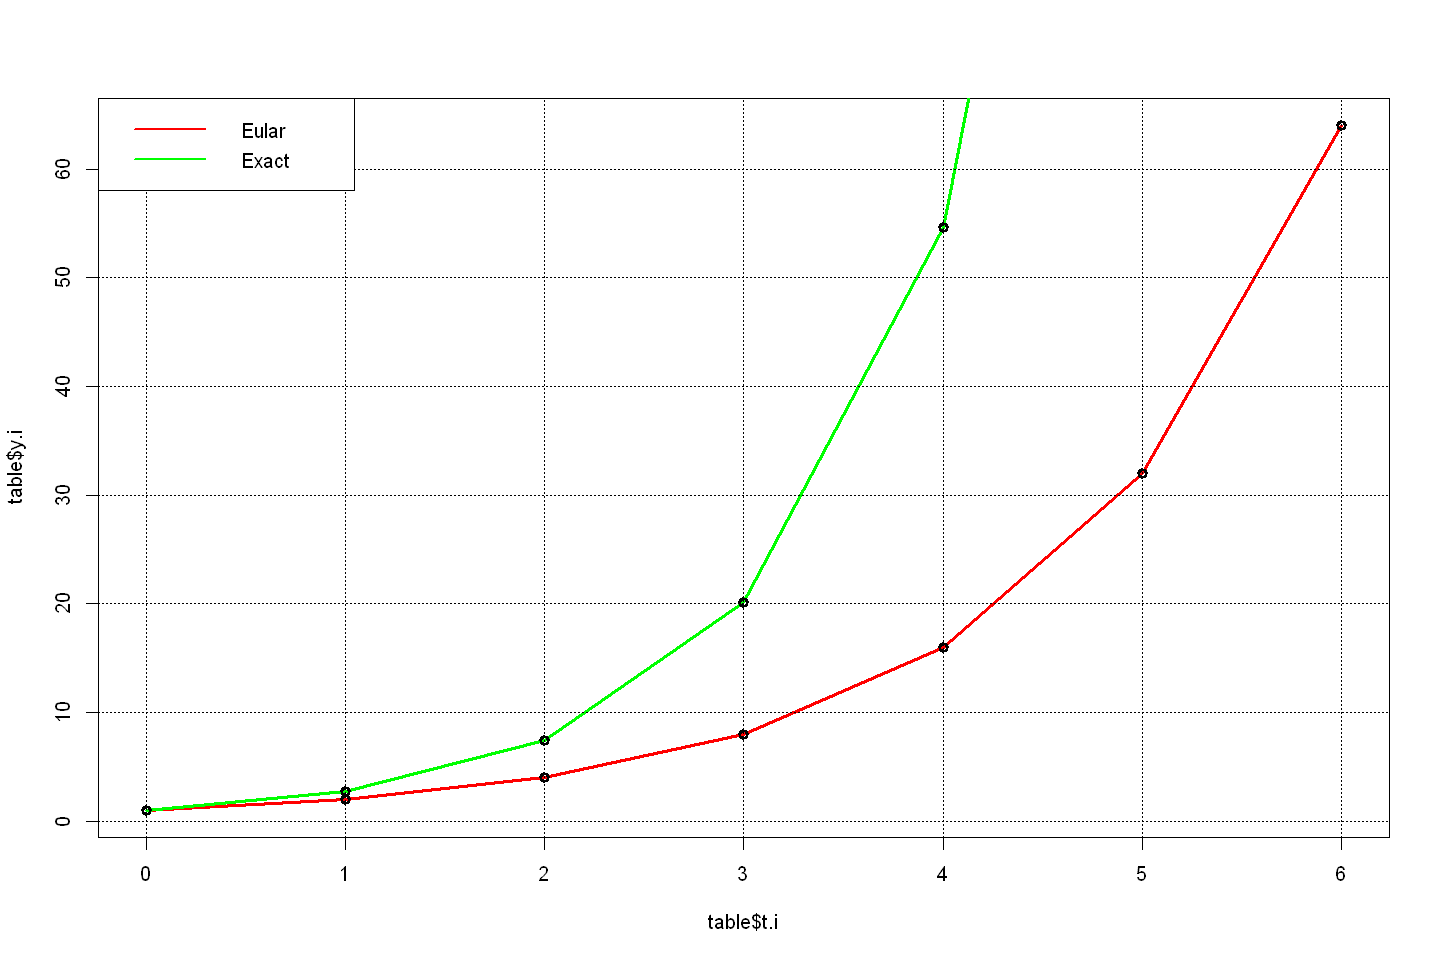

In [35]:
plot(table$t.i, table$y.i, col = 'red', type = 'l', lwd = 3)
points(table$t.i, table$y.i, col = 'black', lwd = 3)

lines(table$t.i, table$y, col = 'green', lwd = 3)
points(table$t.i, table$y, col = 'black', lwd = 3)

grid(col = 'black')
legend('topleft', legend = c('Eular', 'Exact'), lwd = 2, col = c('red', 'green'))

In [36]:
table$error <- table$y.i - table$y

table

t.i,h,y.i,Dy/dt,y,error
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,1,1.000000,0.0000000
1,1,2,2,2.718282,-0.7182818
2,1,4,4,7.389056,-3.3890561
3,1,8,8,20.085537,-12.0855369
4,1,16,16,54.598150,-38.5981500
5,1,32,32,148.413159,-116.4131591
6,1,64,64,403.428793,-339.4287935


In [37]:
t_0 <- 0
t_n <- 6
h <- 0.03
y_0 <- 1

In [38]:
table <- euler_method(t_0, h, t_n, y_0, y_dash)

head(table)

,t_i,h,y_i,f_dash
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,0.03,1.000000,1.000000
2,0.03,0.03,1.030000,1.030000
3,0.06,0.03,1.060900,1.060900
4,0.09,0.03,1.092727,1.092727
5,0.12,0.03,1.125509,1.125509
6,0.15,0.03,1.159274,1.159274


In [39]:
colnames(table) <- c('t.i', 'h', 'y.i', 'Dy/dt')

table$y <- exp(table$t.i)

head(table)

,t.i,h,y.i,Dy/dt,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,0.03,1.000000,1.000000,1.000000
2,0.03,0.03,1.030000,1.030000,1.030455
3,0.06,0.03,1.060900,1.060900,1.061837
4,0.09,0.03,1.092727,1.092727,1.094174
5,0.12,0.03,1.125509,1.125509,1.127497
6,0.15,0.03,1.159274,1.159274,1.161834


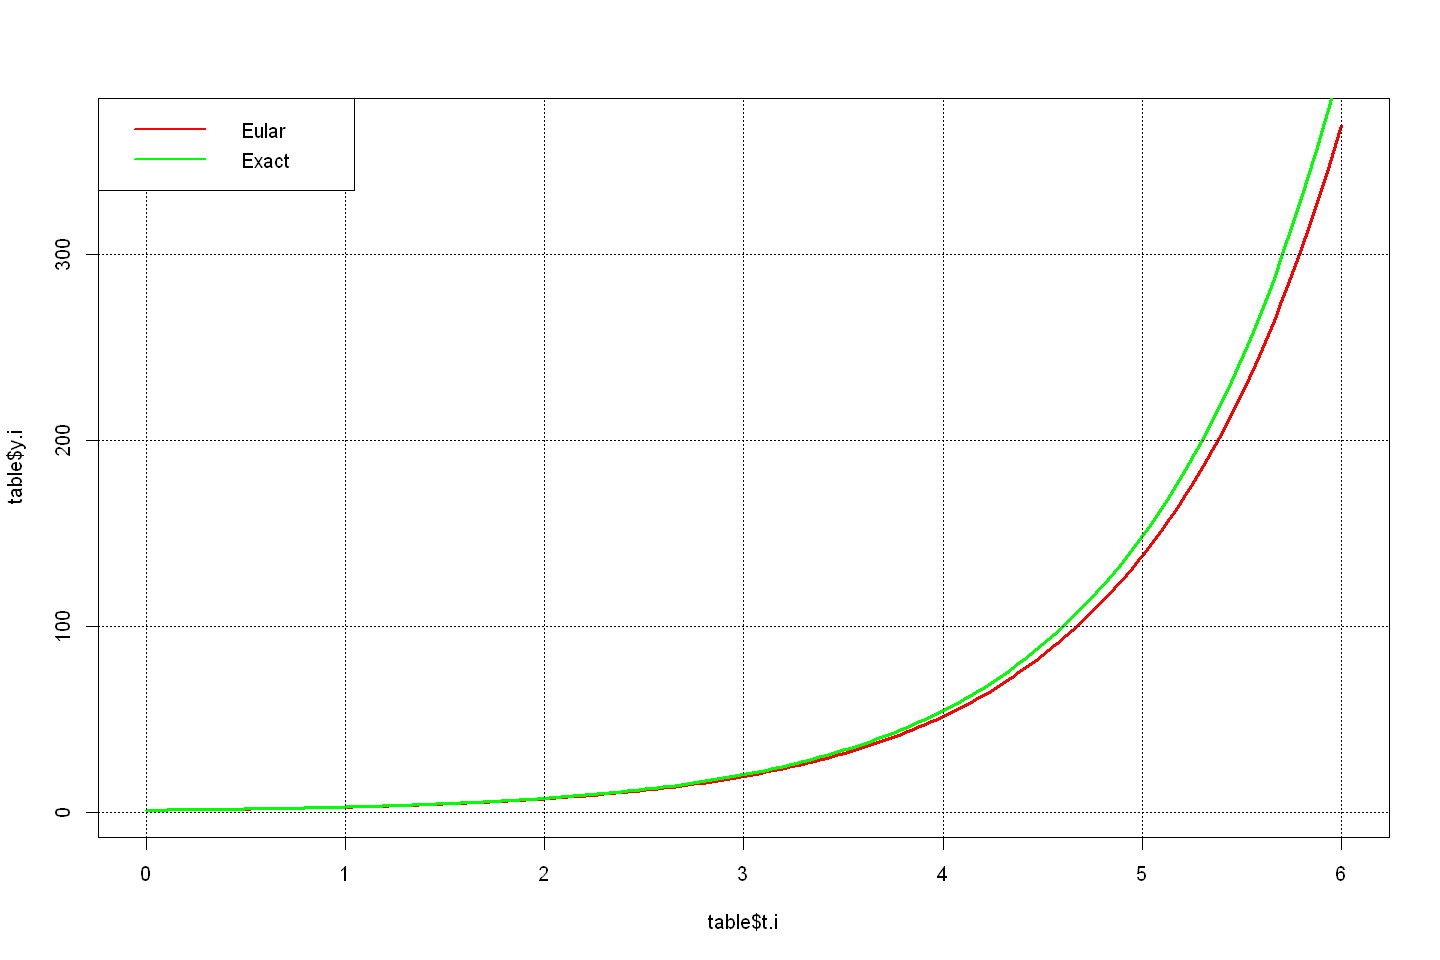

In [40]:
plot(table$t.i, table$y.i, col = 'red', type = 'l', lwd = 3)
lines(table$t.i, table$y, col = 'green', lwd = 3)
grid(col = 'black')
legend('topleft', legend = c('Eular', 'Exact'), lwd = 2, col = c('red', 'green'))

In [41]:
table$error <- table$y.i - table$y

head(table)

,t.i,h,y.i,Dy/dt,y,error
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,0.03,1.000000,1.000000,1.000000,0.0000000000
2,0.03,0.03,1.030000,1.030000,1.030455,-0.0004545340
3,0.06,0.03,1.060900,1.060900,1.061837,-0.0009365465
4,0.09,0.03,1.092727,1.092727,1.094174,-0.0014472837
5,0.12,0.03,1.125509,1.125509,1.127497,-0.0019880416
6,0.15,0.03,1.159274,1.159274,1.161834,-0.0025601684


In [42]:
y_dash <- function(t_i, y) {
    -2.3 * y
}

y_dash

function(t_i, y) {
    -2.3 * y
}

In [43]:
t_0 <- 0
t_n <- 6
h <- 1
y_0 <- 1

In [44]:
table <- euler_method(t_0, h, t_n, y_0, y_dash)

table

t_i,h,y_i,f_dash
<dbl>,<dbl>,<dbl>,<dbl>
0,1,1.000000,-2.300000
1,1,-1.300000,2.990000
2,1,1.690000,-3.887000
3,1,-2.197000,5.053100
4,1,2.856100,-6.569030
5,1,-3.712930,8.539739
6,1,4.826809,-11.101661


In [45]:
colnames(table) <- c('t.i', 'h', 'y.i', 'Dy/dt')

table$y <- exp(-2.3 * table$t.i)

head(table)

,t.i,h,y.i,Dy/dt,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,1.00000,-2.300000,1.000000e+00
2,1,1,-1.30000,2.990000,1.002588e-01
3,2,1,1.69000,-3.887000,1.005184e-02
4,3,1,-2.19700,5.053100,1.007785e-03
5,4,1,2.85610,-6.569030,1.010394e-04
6,5,1,-3.71293,8.539739,1.013009e-05


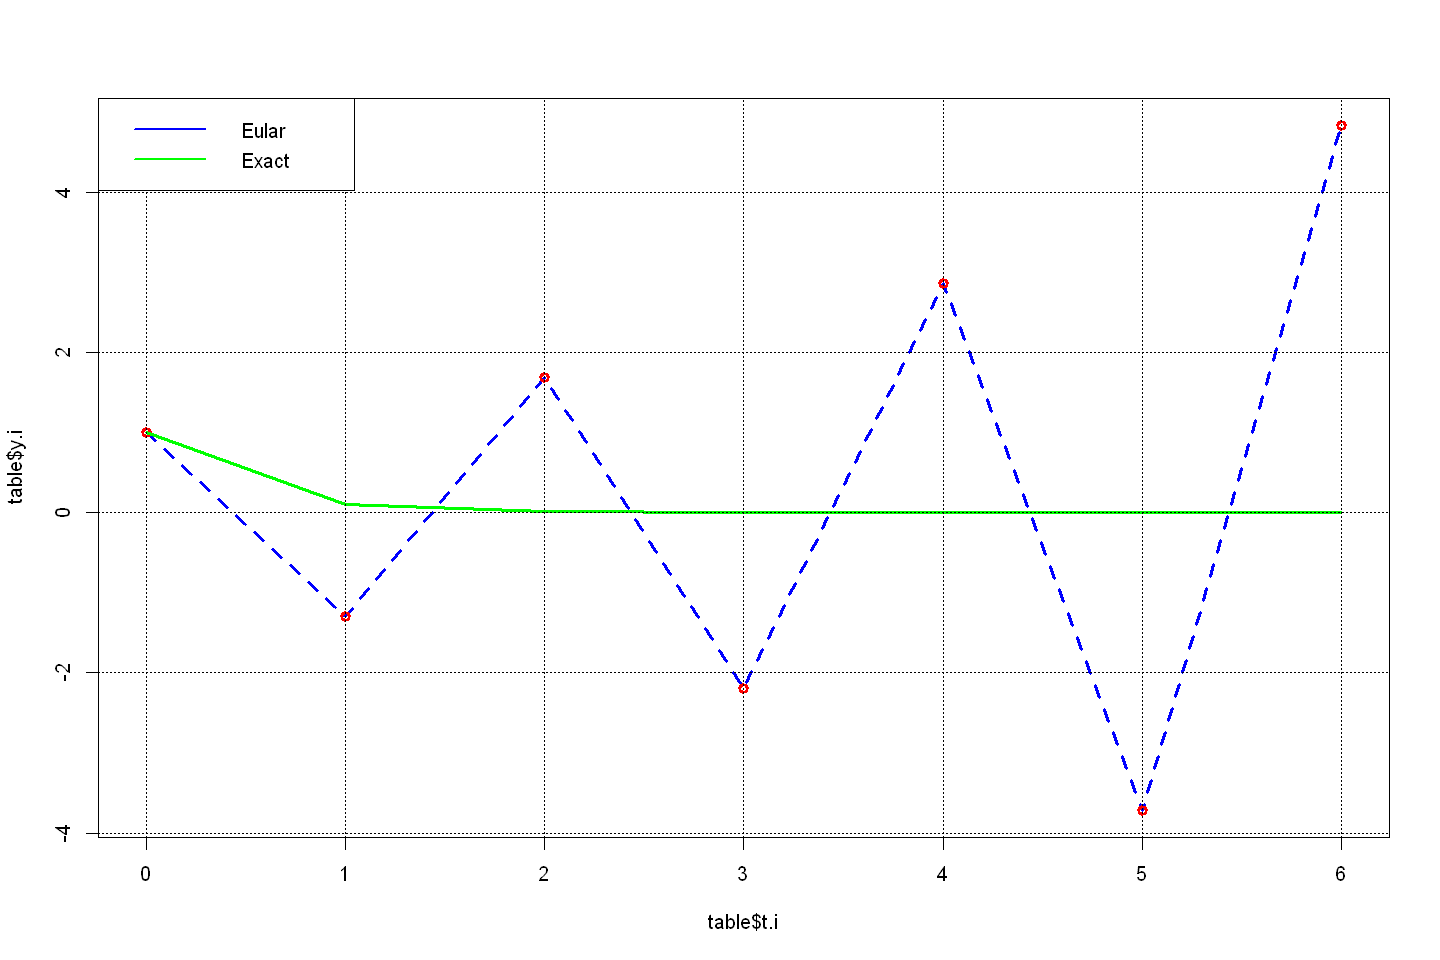

In [46]:
plot(table$t.i, table$y.i, col = 'blue', type = 'l', lty = 2, lwd = 3)
points(table$t.i, table$y.i, col = 'red', lwd = 3)

lines(table$t.i, table$y, col = 'green', lwd = 3)
grid(col = 'black')
legend('topleft', legend = c('Eular', 'Exact'), lwd = 2, col = c('blue', 'green'))

In [47]:
t_0 <- 0
t_n <- 6
h <- .6
y_0 <- 1

In [48]:
table <- euler_method(t_0, h, t_n, y_0, y_dash)

colnames(table) <- c('t.i', 'h', 'y.i', 'Dy/dt')

table$y <- exp(-2.3 * table$t.i)

head(table)

,t.i,h,y.i,Dy/dt,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0,0.6,1.000000000,-2.30000000,1.000000000
2,0.6,0.6,-0.380000000,0.87400000,0.251578553
3,1.2,0.6,0.144400000,-0.33212000,0.063291768
4,1.8,0.6,-0.054872000,0.12620560,0.015922852
5,2.4,0.6,0.020851360,-0.04795813,0.004005848
6,3.0,0.6,-0.007923517,0.01822409,0.001007785


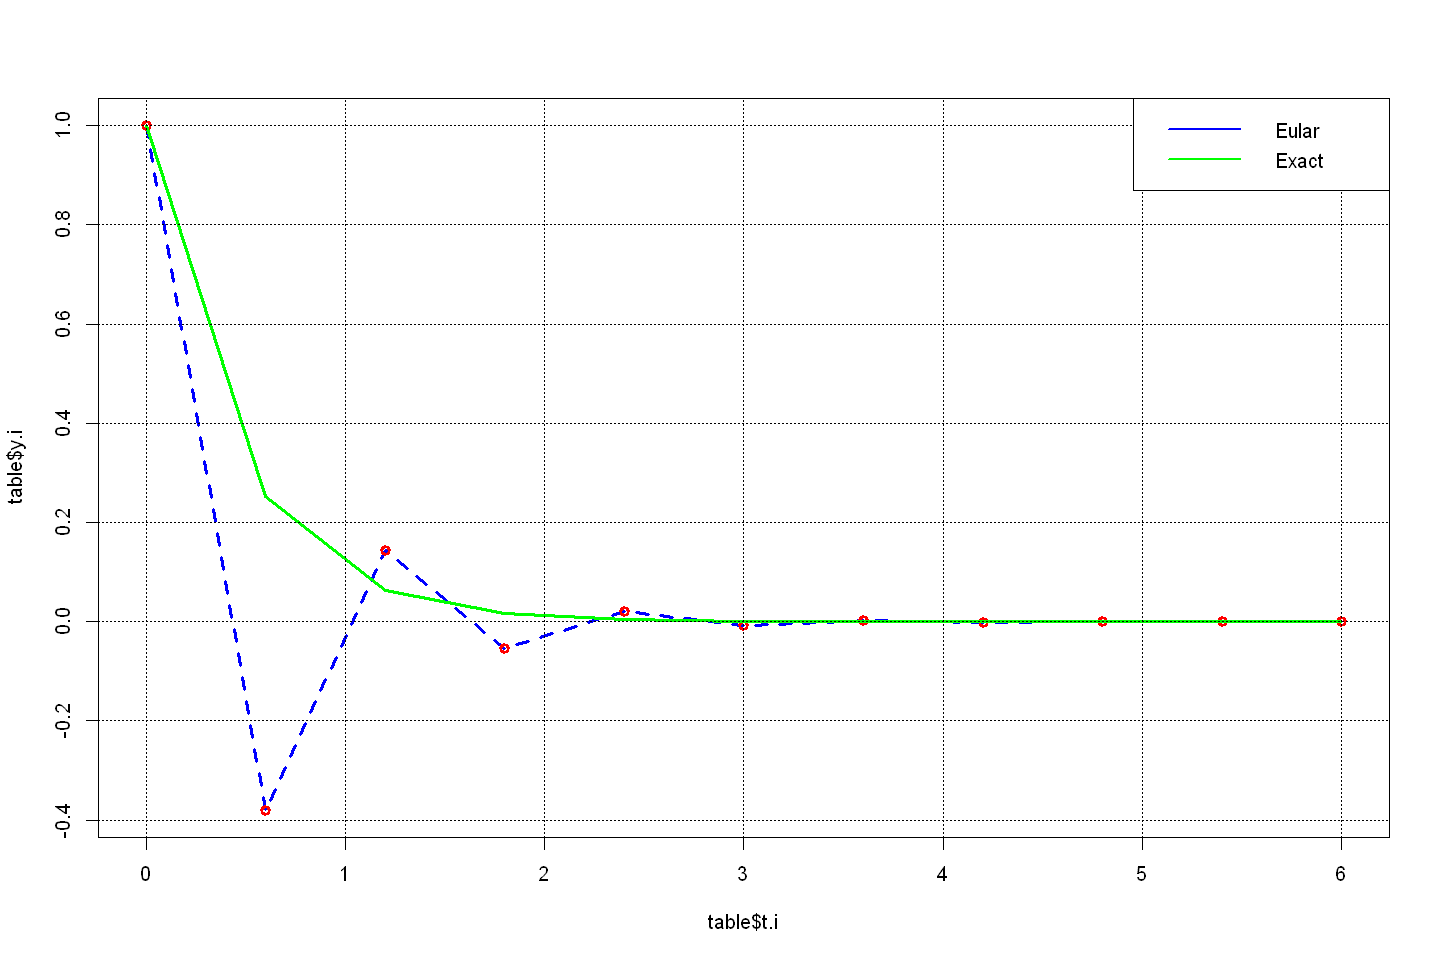

In [50]:
plot(table$t.i, table$y.i, col = 'blue', type = 'l', lty = 2, lwd = 3)
points(table$t.i, table$y.i, col = 'red', lwd = 3)

lines(table$t.i, table$y, col = 'green', lwd = 3)
grid(col = 'black')
legend('topright', legend = c('Eular', 'Exact'), lwd = 2, col = c('blue', 'green'))